## Changes in Sediment Provenance on the East Coast Southern Africa


### Introduction

The climate over large parts of Africa is characterised by a strong seasonality with summer rainfall and the approximate position of the ITCZ and its associated rainbelt migrating between the North and South continent over the course of the year. Migrations in the rainbelt therefore govern which areas receive rainfall. Ultimately, this may control the sources of sediment to the eastern coast of Southern Africa. The goal of my project is to create a record of sediment provenance changes in eastern South Africa over the past 150 kyr. This will help determine whether variations in terrigenous sediment sources can inform us about the impacts of global climate changes on more local weather systems. 

To accomplish this goal, I have collected K/Ar age data of mud samples from Site U1474 from IODP expedition 361. For this project, I will compare the K-Ar record with the physical properties of the same cores. I will also make use of independent rainfall proxy records as a test for my conclusions about past rainfall as informed by my core records. 

![Agulhas](http://publications.iodp.org/proceedings/361/361PR_F03.png)

In [20]:
# import packages

import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### Age model

All the data that will be used for this project is provided on a depth scale. However, for it be understood in a geologic context and compared with other records, it has to be converted to an age scale. 


In [21]:
# import the tie points

tie_points = pd.read_csv("../Final_Project/DATA/tie_points_1474",delimiter=" ", 
                         header=None, names=["depth", "age"])


In [24]:
tie_points

,depth,age
0,0.12,9
1,0.49,18
2,3.67,109
3,4.04,126
4,4.65,138
5,5.39,155


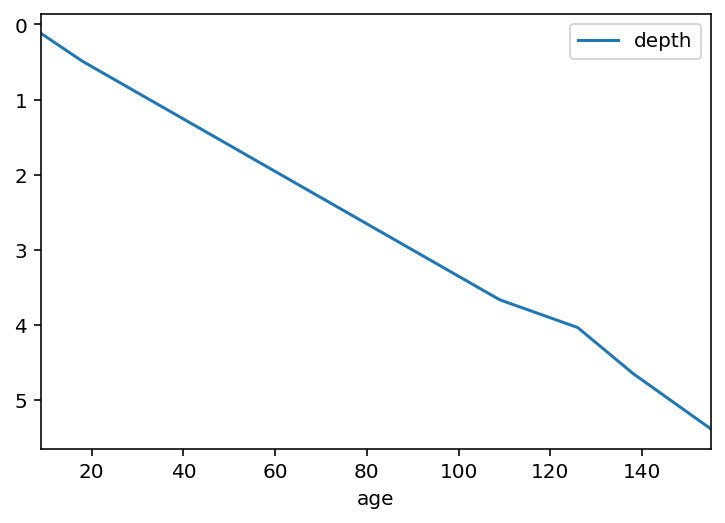

In [22]:
fig, ax =plt.subplots(figsize=(6,4))

tie_points.plot(x ='age', y='depth', ax=ax, )

ax.invert_yaxis()

#sns.lmplot(x="age", y="depth", data=tie_points, fit_reg=True)

#### Define a function of the age model based on tie points to LR04

In [33]:
def age_kyr_function(D):
    age = (28.438*D) + 5.4787
    return age


In [34]:
age_kyr_function(msl.depth)

0        6.900600
1        7.611550
2        8.322500
3        9.033450
4        9.744400
5       10.455350
6       11.166300
7       11.877250
8       12.588200
9       13.299150
10      14.010100
11      14.721050
12      15.432000
13      16.142950
14      16.853900
15      17.564850
16      18.275800
17      18.986750
18      19.697700
19      20.408650
20      21.119600
21      21.830550
22      22.541500
23      23.252450
24      23.963400
25      24.674350
26      25.385300
27      26.096250
28      26.807200
29      27.518150
          ...    
400    153.839746
401    133.904708
402    134.615658
403    135.326608
404    136.037558
405    136.748508
406    137.459458
407    138.170408
408    138.881358
409    139.592308
410    140.303258
411    141.014208
412    141.725158
413    142.436108
414    143.147058
415    143.858008
416    144.568958
417    145.279908
418    145.990858
419    146.701808
420    147.412758
421    148.123708
422    148.834658
423    149.545608
424    150

In [6]:
# Import LR04, benthic oxygen for this data, and tie points

#file = open('../Final_Project/DATA/LR04.csv')

lr4 = pd.read_csv('../Final_Project/DATA/LRO4.csv')
lr4.head()

,Time,d18O,Error
0,0.0,3.23,0.03
1,1.0,3.23,0.04
2,2.0,3.18,0.03
3,3.0,3.29,0.03
4,4.0,3.30,0.03


In [15]:
# import benthic oxygen record used to create age model

benthics = pd.read_csv('../Final_Project/DATA/benthics.csv')
benthics.head()

,exp,site,hole,core,type,section,sec_half,pcl_cm,type.1,too_name,top_offset,btm_offset,ccsf_a,sam,mod_am,d18O,avgs
0,361,U1474,F,1,H,1,W,150,HRND,SPATULA,15.24,16.24,0.1224,3.86784,10.750917,2.830,2.830
1,361,U1474,F,1,H,1,W,150,HRND,SPATULA,39.72,40.72,0.3672,11.60352,15.041708,4.369,4.369
2,361,U1474,F,1,H,1,W,150,HRND,SPATULA,51.96,52.96,0.4896,15.47136,19.515042,4.555,4.555
3,361,U1474,F,1,H,1,W,150,HRND,SPATULA,64.20,65.20,0.6120,19.33920,22.474194,4.497,4.504
4,361,U1474,F,1,H,1,W,150,HRND,SPATULA,64.20,65.20,0.6120,19.33920,22.474194,4.510,4.504


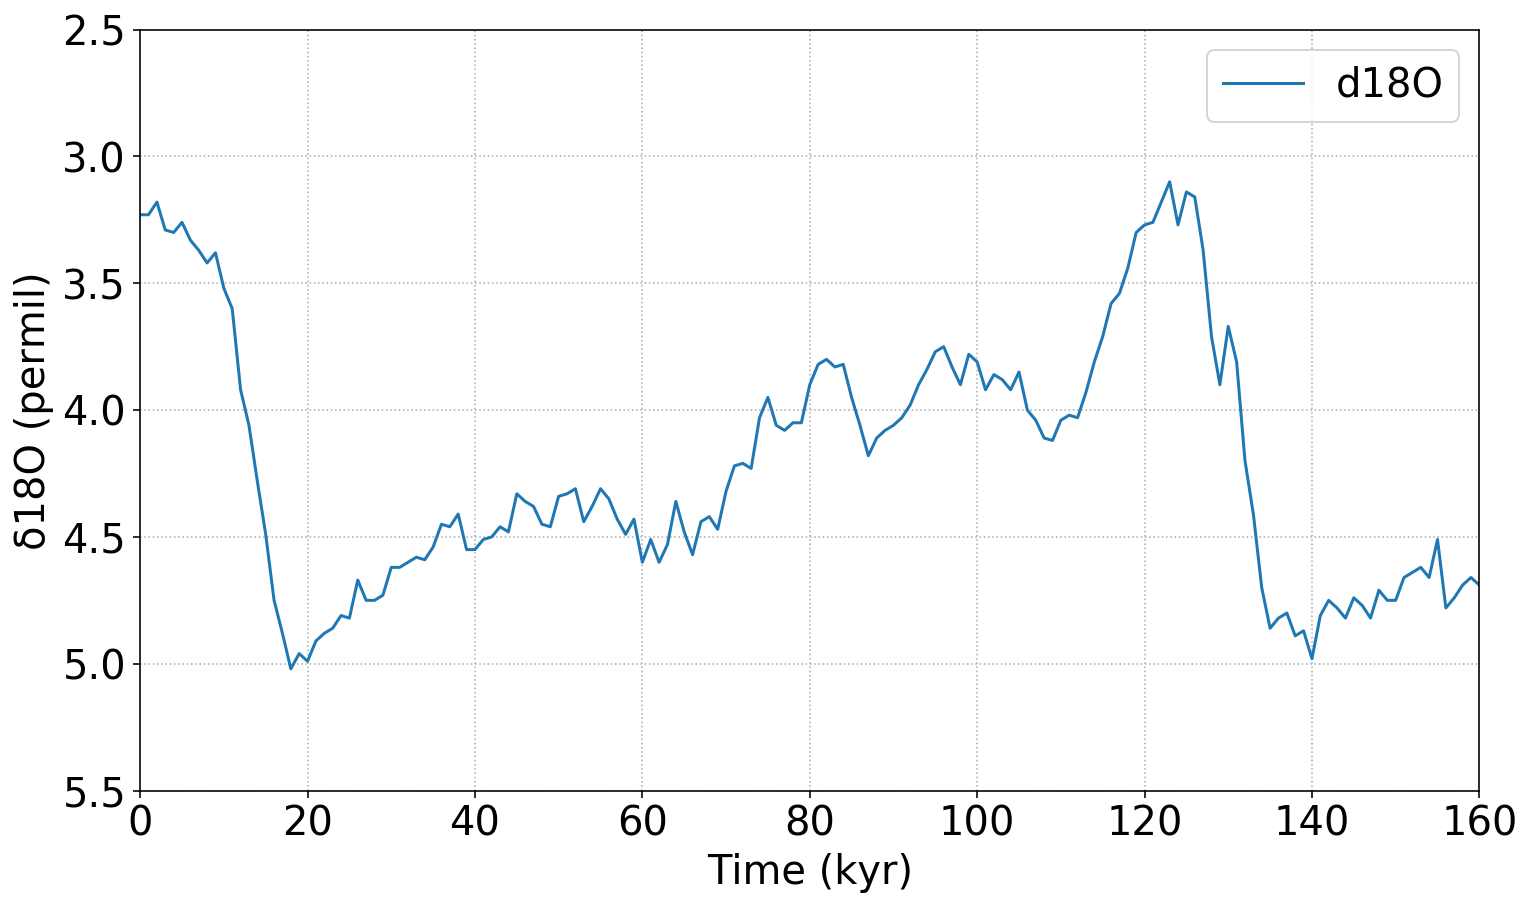

In [14]:
# Plot global benthic record 

fig, ax =plt.subplots(figsize=(12,7))


lr4.plot(x ='Time', y='d18O', ax=ax)

ax.set_xlim(0, 160)
ax.invert_yaxis()
ax.grid(True, which='major', linestyle='dotted')
ax.set_ylim(5.5, 2.5)
ax.set_ylabel('δ18O (permil)')
ax.set_xlabel('Time (kyr)')

mpl.rcParams.update({'font.size': 15})

#### K-Ar record

In [4]:
# import K-Ar ages 

k_ar = pd.read_csv('../Final_Project/DATA/Ages_40.csv')
k_ar.head()

,Exp,Site,Hole,Core,Type,Section,Sechalf,PCL,TYPE,Tool_name,TopOffset,BottomOffset,SampleID,SampleWeight,Avg_age,1sigma,PercentStd,CCSFA,SBA,mod_am
0,361,U1474,F,1,H,1,W,150,HRND,SPATULA,3,4,CM1,0.8220,349.7,3.5,1.0,0.00,0.00000,7.078000
1,361,U1474,F,1,H,1,W,150,HRND,SPATULA,15,16,CM2,0.8259,340.2,5.2,1.5,0.12,0.00306,10.800000
2,361,U1474,F,1,H,1,W,150,HRND,SPATULA,27,28,CM3,0.8172,337.8,4.7,1.4,0.24,0.00612,14.422000
3,361,U1474,F,1,H,1,W,150,HRND,SPATULA,40,41,CM4,0.8097,375.3,0.4,0.1,0.37,0.00918,15.041708
4,361,U1474,F,1,H,1,W,150,HRND,SPATULA,52,53,CM5,0.8142,347.3,2.6,0.8,0.49,0.01224,19.515042


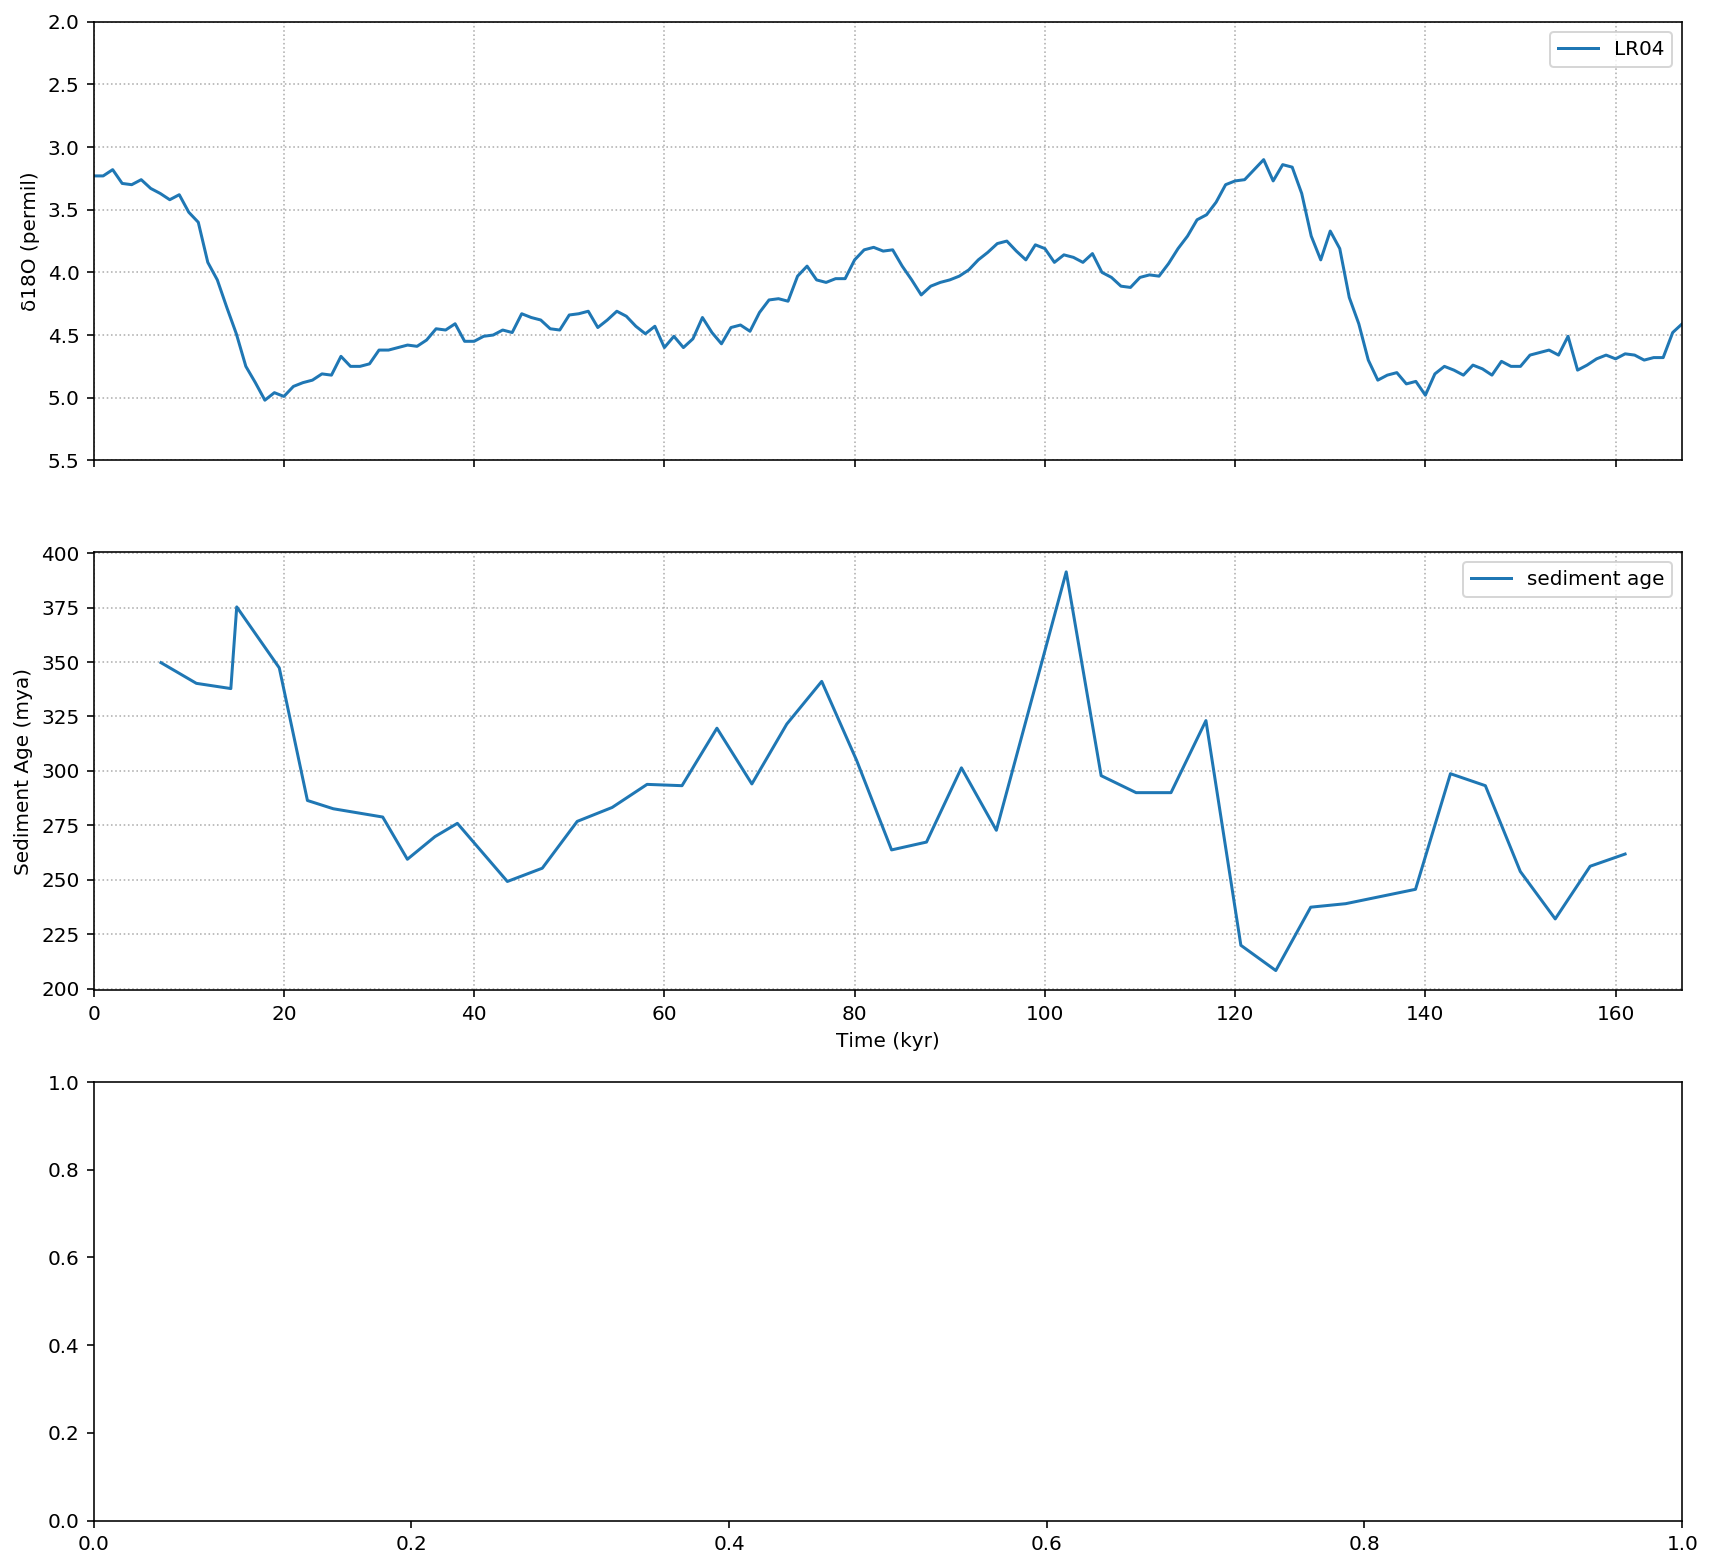

#### Physical properties data

In [31]:
# Magnetic susceptibility

msl = pd.read_csv('../Final_Project/DATA/MSL.csv')
msl = msl.rename(columns={"Magnetic susceptibility (instr. units)": "msl", "Depth CSF-A (m)": "depth"})
msl.head()

,Exp,Site,Hole,Core,Type,Sect,A/W,Offset (cm),depth,Depth CSF-A (m).1,msl,Timestamp (UTC),Instrument,Instrument group,Text ID,Test No.,Comments
0,361,U1474,F,1,H,1,NaN,5.0,0.050,0.050,34.53,2016-02-16 15:29:54,MS2C-695,WRMSL,SECT7637991,95459171,NaN
1,361,U1474,F,1,H,1,NaN,7.5,0.075,0.075,32.49,2016-02-16 15:29:54,MS2C-695,WRMSL,SECT7637991,95459171,NaN
2,361,U1474,F,1,H,1,NaN,10.0,0.100,0.100,30.44,2016-02-16 15:29:54,MS2C-695,WRMSL,SECT7637991,95459171,NaN
3,361,U1474,F,1,H,1,NaN,12.5,0.125,0.125,29.27,2016-02-16 15:29:54,MS2C-695,WRMSL,SECT7637991,95459171,NaN
4,361,U1474,F,1,H,1,NaN,15.0,0.150,0.150,28.68,2016-02-16 15:29:54,MS2C-695,WRMSL,SECT7637991,95459171,NaN


In [27]:
# Reflectance and colorimetry
refl1 = pd.read_csv('../Final_Project/DATA/RGB.csv', sep=',')
refl = refl1.rename(columns={"Depth CSF-A (m)": "depth", "Timestamp (UTC)": "timestamp", 
                             "Depth CCSF-361-U1474-ABDEF-20160220 (m)": "CCSF"})
refl.head()

,Exp,Site,Hole,Core,Type,Sect,A/W,Offset (cm),depth,CCSF,R,G,B,timestamp,Instrument,Instrument group,Text ID,Test No.,Comments
0,361,U1474,F,1,H,1,A,4.73,0.047,0.047,73.6,61.3,43.5,2/16/16 17:33,CV-L107C-L170542B,SHIL,SHLF7638011,95479121,Auto-Log Split Section
1,361,U1474,F,1,H,1,A,5.23,0.052,0.052,72.6,60.3,42.8,2/16/16 17:33,CV-L107C-L170542B,SHIL,SHLF7638011,95479121,Auto-Log Split Section
2,361,U1474,F,1,H,1,A,5.73,0.057,0.057,72.7,59.9,41.8,2/16/16 17:33,CV-L107C-L170542B,SHIL,SHLF7638011,95479121,Auto-Log Split Section
3,361,U1474,F,1,H,1,A,6.23,0.062,0.062,73.2,60.0,41.5,2/16/16 17:33,CV-L107C-L170542B,SHIL,SHLF7638011,95479121,Auto-Log Split Section
4,361,U1474,F,1,H,1,A,6.73,0.067,0.067,73.0,59.6,41.0,2/16/16 17:33,CV-L107C-L170542B,SHIL,SHLF7638011,95479121,Auto-Log Split Section


In [14]:
# Gamma ray (natural)
gamma1 = pd.read_csv("../Final_Project/DATA/NGR.csv")
gamma = gamma1.rename(columns={"NGR total counts (cps)": "ngrT", "Depth CSF-A (m)": "depth"})
gamma.head()

,Exp,Site,Hole,Core,Type,Sect,Offset (cm),depth,Depth CSF-A (m).1,ngrT,Error (cps),Relative Error,Timestamp (UTC),Instrument,Text ID,Test No.,Comments
0,361,U1474,F,1,H,1,10.0,0.1,0.1,24.250,0.541,0.022,2016-02-16 15:43:32,NGR System,SECT7637991,95459301,NaN
1,361,U1474,F,1,H,1,20.0,0.2,0.2,25.398,0.315,0.012,2016-02-16 15:43:32,NGR System,SECT7637991,95459301,NaN
2,361,U1474,F,1,H,1,30.0,0.3,0.3,32.128,0.349,0.011,2016-02-16 15:43:32,NGR System,SECT7637991,95459301,NaN
3,361,U1474,F,1,H,1,40.0,0.4,0.4,39.380,0.389,0.010,2016-02-16 15:43:32,NGR System,SECT7637991,95459301,NaN
4,361,U1474,F,1,H,1,50.0,0.5,0.5,38.710,0.386,0.010,2016-02-16 15:43:32,NGR System,SECT7637991,95459301,NaN


#### Independent Precipitation proxies

In [ ]:
# speleothem record

! wget https://www1.ncdc.noaa.gov/pub/data/paleo/speleothem/africa/wolkberg2009.txt

Reference: Holzkämper, S., K. Holmgren, J. Lee-Thorp, S. Talma, A. Mangini, and T. Partridge.  2009. Late Pleistocene stalagmite growth in Wolkberg Cave, South Africa. Earth and Planetary Science Letters, Vol. 282, pp. 212-221.  doi:10.1016/j.epsl.2009.03.016.

#### All plots together

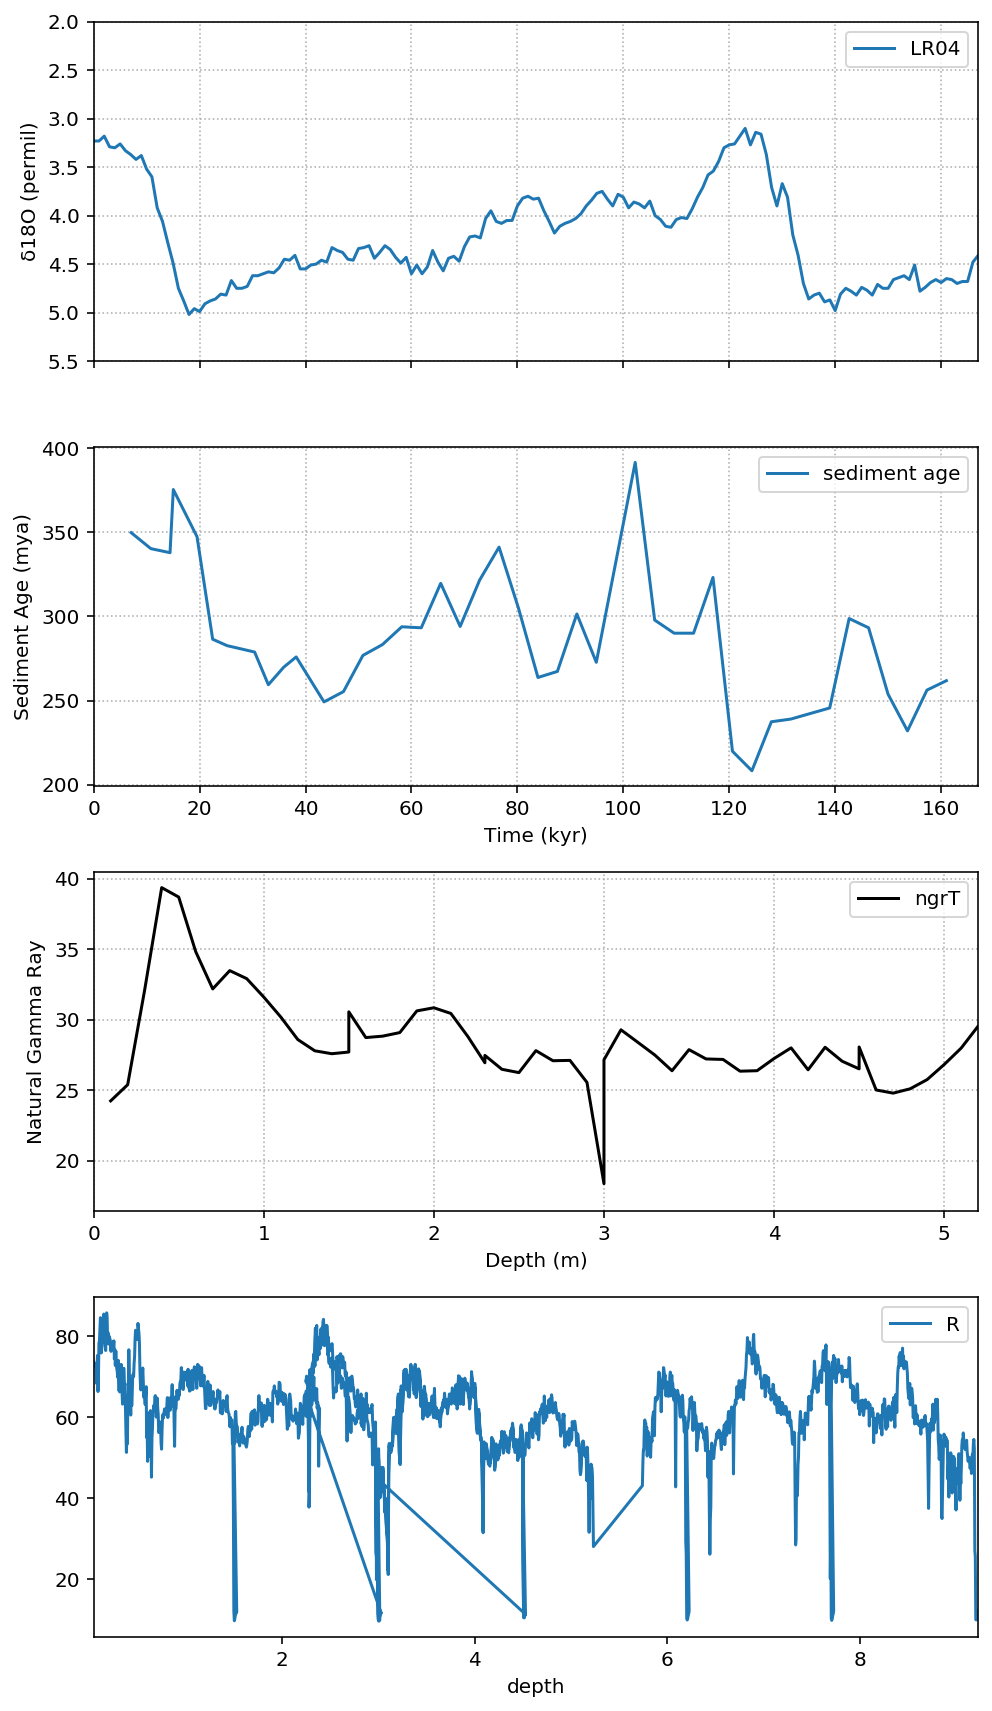

In [28]:
fig, ax =plt.subplots(figsize=(7,12), nrows=4)

lr4.plot(x ='Time', y='d18O', ax=ax[0], label = 'LR04')

ax[0].set_xlim(0, 167)
ax[0].invert_yaxis()
ax[0].grid(True, which='major', linestyle='dotted')
ax[0].set_ylim(5.5, 2)
ax[0].set_ylabel('δ18O (permil)')
ax[0].set_xticklabels([])
ax[0].set_xlabel(' ')
#My data
k_ar.plot(x ='mod_am', y='Avg_age', ax=ax[1], label = 'sediment age')

ax[1].set_xlim(0, 167)
#ax[1].invert_yaxis()
ax[1].grid(True, which='major', linestyle='dotted')
#ax[1].set_ylim(5.5, 2)
ax[1].set_ylabel('Sediment Age (mya)')
ax[1].set_xlabel('Time (kyr)')

gamma.plot(x ='depth', y='ngrT', ax=ax[2], c='k')

ax[2].set_xlim(0, 5.2)
#ax.invert_yaxis()
ax[2].grid(True, which='major', linestyle='dotted')
#ax.set_ylim(5.5, 2.5)
ax[2].set_ylabel('Natural Gamma Ray')
ax[2].set_xlabel('Depth (m)')

refl.plot(x='depth', y='R', ax=ax[3])
ax[

plt.tight_layout()

#### Conclusion